In [2]:
import json

with open('/content/secrets.json') as f:
    secrets = json.load(f)

hf_token = secrets.get('HF_TOKEN', '')

In [3]:
!pip install -q transformers==4.37.2
!pip install bitsandbytes==0.41.3 accelerate==0.25.0
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q gradio
!pip install -q gTTS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 36.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.9/307.9 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━

In [4]:
import torch
from transformers import BitsAndBytesConfig, pipeline

In [5]:
quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [6]:
model_id = 'llava-hf/llava-1.5-7b-hf'

In [7]:
pipe = pipeline(
    'image-to-text',
    model = model_id,
    model_kwargs = {'quantization_config': quant_config}
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

In [9]:
pipe

In [8]:
import whisper
import gradio as gr
import time
import warnings
import os
from gtts import gTTS
from PIL import Image

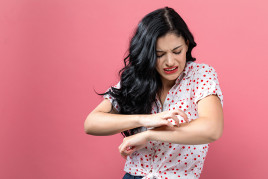

In [10]:
image_path = '/content/GettyImages-1044939258.jpg'
image = Image.open(image_path)
image

In [11]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
max_new_tokens = 300
prompt_instructions = """
Describe the image as informative as possible
You are a helpful AI assistant who is able to answer the questions about the image
What is the image all about ?
Now generate the helpful answer
"""

In [18]:
prompt = "User: <image>\n" + prompt_instructions + "\nAssistant:"

In [19]:
output = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens":max_new_tokens})

In [20]:
output

[{'generated_text': 'User:  \n\nDescribe the image as informative as possible\nYou are a helpful AI assistant who is able to answer the questions about the image\nWhat is the image all about ?\nNow generate the helpful answer\n\nAssistant: The image features a woman with long hair, wearing a white shirt with red polka dots. She is looking at her wrist, possibly checking the time or feeling a pain or discomfort. The woman appears to be the main focus of the image, and her expression and posture suggest that she is the one who is checking her wrist.'}]

In [21]:
for sent in sent_tokenize(output[0]['generated_text']):
  print(sent)

User:  

Describe the image as informative as possible
You are a helpful AI assistant who is able to answer the questions about the image
What is the image all about ?
Now generate the helpful answer

Assistant: The image features a woman with long hair, wearing a white shirt with red polka dots.
She is looking at her wrist, possibly checking the time or feeling a pain or discomfort.
The woman appears to be the main focus of the image, and her expression and posture suggest that she is the one who is checking her wrist.


In [22]:
warnings.filterwarnings("ignore")

In [23]:
import numpy as np
torch.cuda.is_available()

True

In [24]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [25]:
print(f"Using torch {torch.__version__} ({DEVICE})")

Using torch 2.1.0+cu121 (cuda)


In [26]:
import whisper
model = whisper.load_model("medium", device= DEVICE)

100%|█████████████████████████████████████| 1.42G/1.42G [00:40<00:00, 37.3MiB/s]


In [28]:
print(
    f"Model is {'multilingual' if model.is_multilingual else 'English-only'} "
    f"and has  {sum(np.prod(v.shape) for v in model.parameters()):,} parameters."
)

Model is multilingual and has  762,321,920 parameters.


In [29]:
import re
import datetime

In [30]:
tstamp = datetime.datetime.now()
tstamp = str(tstamp).replace(" ","_")
logfile = f"log_{tstamp}.txt"

In [31]:
def writehistory(text):
  with open(logfile, "a", encoding='utf-8') as f:
    f.write(text)
    f.write("\n")
  f.close()

In [32]:
import requests

In [63]:
def img2txt(input_text, input_image):

    # load the image
    image = Image.open(input_image)

    writehistory(f"Input text: {input_text} - Type: {type(input_text)} - Dir: {dir(input_text)}")
    if type(input_text) == tuple:
        prompt_instructions = """
        Describe the image using as much detail as possible, is it a painting, a photograph, what colors are predominant, what is the image about?
        """
    else:
        prompt_instructions = """Act as an expert in imagery descriptive analysis, using as much detail as possible from the image, respond to the following prompt:""" + input_text

    writehistory(f"prompt_instructions: {prompt_instructions}")
    prompt = "USER: <image>\n" + str(prompt_instructions) + "\nASSISTANT:"

    outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

    # Properly extract the response text
    if outputs is not None and len(outputs[0]["generated_text"]) > 0:
        match = re.search(r'ASSISTANT:\s*(.*)', outputs[0]["generated_text"])
        if match:
            # Extract the text after "ASSISTANT:"
            reply = match.group(1)
        else:
            reply = "No response found."
    else:
        reply = "No response generated."

    return reply


In [34]:
def transcribe(audio):
  if audio is None or audio == '':
    return ('','',None)

    audio = whisper.load_audio(audio)
    audio = whisper.pad_or_trim(audio)

    mel = whisper.log_mel_spectrogram(audio).to(model.device)

    _, probs = model.detect_language(mel)

    options = whisper.DecodingOptions()
    results = whisper.decode(model, mel, options)
    result_text = result.text

    return result_text

In [35]:
def text_to_speech(text, file_path):
  language = 'en'

  audioobj = gTTS(text = text,
                  lang = language,
                  slow = False)
  audioobj.save(file_path)
  return file_path

In [41]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [42]:
!ffmpeg -f lavfi -i anullsrc=r=44100:cl=mono -t 10 -q:a 9 -acodec libmp3lame Temp.mp3

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [64]:
import gradio as gr
import base64
import os

# A function to handle audio and image inputs
def process_inputs(audio_path, image_path):
    # Process the audio file (assuming this is handled by a function called 'transcribe')
    speech_to_text_output = transcribe(audio_path)

    # Handle the image input
    if image_path:
        chatgpt_output = img2txt(speech_to_text_output, image_path)
    else:
        chatgpt_output = "No image provided."

    # Assuming 'transcribe' also returns the path to a processed audio file
    processed_audio_path = text_to_speech(chatgpt_output, "Temp3.mp3")  # Replace with actual path if different

    return speech_to_text_output, chatgpt_output, processed_audio_path

# Create the interface
iface = gr.Interface(
    fn=process_inputs,
    inputs=[
        gr.Audio(sources=["microphone"], type="filepath"),
        gr.Image(type="filepath")
    ],
    outputs=[
        gr.Textbox(label="Speech to Text"),
        gr.Textbox(label="ChatGPT Output"),
        gr.Audio("Temp.mp3")
    ],
    title="Learn OpenAI Whisper: Image processing with Whisper and Llava",
    description="Upload an image and interact via voice input and audio response."
)

# Launch the interface
iface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://2dbf855c5b54206ba3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://2dbf855c5b54206ba3.gradio.live
